CNN不仅在图像分类广泛应用，在NLP领域用于文本分类的研究非常多，如下论文
- [WordCNN : Convolutional Neural Networks for Sentence Classification](https://arxiv.org/abs/1408.5882)
- [CharCNN : Character-level Convolutional Networks for Text Classification](https://arxiv.org/abs/1509.01626)
- [VDCNN : Very Deep Convolutional Networks for Text Classification](https://arxiv.org/abs/1606.01781)
- [QRNN : Quasi-Recurrent Neural Networks](https://arxiv.org/abs/1611.01576)


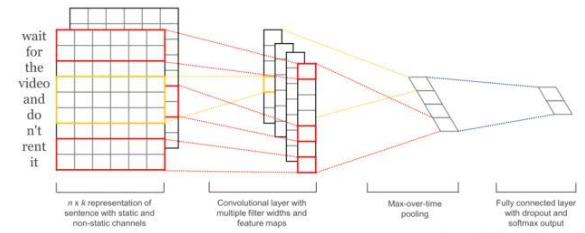

这里的输入层显示有两个channel，其实我们可以看作是一个，因为后文中说到这两个channel分别是static和non-static，即使用的词向量是否随着训练发生变化。

non-static就是词向量随着模型训练变化（Fine tune），这样的好处是词向量可以根据数据集做适当调整，当数据集较小时不推荐此操作，否则容易产生过拟合现象。

static就是直接使用word2vec训练好的词向量即可。

此外，由图可知，输入层是将一个句子所有单词（padding）的词向量进行拼接成一个矩阵，每一行代表一个词。每个句子固定20个词，如果不够的补padding。

卷积层，每个卷积核的大小为filter_size\*embedding_size。filter_size代表卷积核纵向上包含单词个数，即认为相邻几个词之间有词序关系，代码里使用的是[3，4，5]。embedding_size就是词向量的维数。每个卷积核计算完成之后我们就得到了1个列向量，代表着该卷积核从句子中提取出来的特征。有多少个卷积核就能提取出多少种特征，即图中在纵深方向上channel的数量

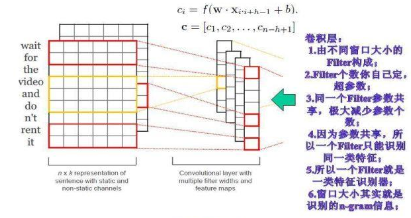

池化层。文中提到pooling操作就是将卷积得到的列向量的最大值提取出来。这样pooling操作之后我们会获得一个num_filters维的行向量，即将每个卷积核的最大值连接起来。这样做还有一个好处就是，如果我们之前没有对句子进行padding操作，那么句子的长度是不同的，卷积之后得到的列向量维度也是不同的，可以通过pooling来消除句子之间长度不同的差异。

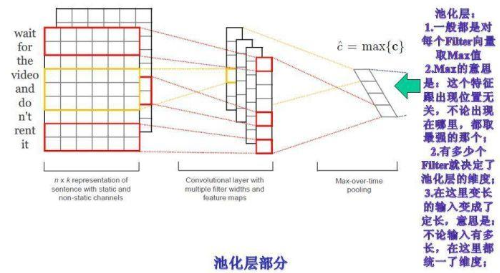

全连接层，为了将pooling层输出的向量转化为我们想要的预测结果，加上一个softmax层即可。针对电影评价的分类任务，就是将其转化为正面、负面两个结果。文中还提到了过拟合的问题，因为实验中所使用的数据集相对较小，很容易就会发生过拟合现象，在实验过程中也会发现当迭代3000多轮的时候准确率就会接近1。所以这里引如dropout来减少过拟合现象。此外还可以考虑L2正则化等方法实现防止过拟合的功能

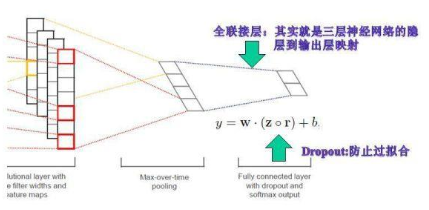